<a href="https://colab.research.google.com/github/rajatDpatil/codesoft-ML-internship/blob/main/Taxt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM SMS DETECTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [ ]:
d_in=pd.read_csv('//content/task 3.csv',encoding='latin-1')
d_in.rename(columns= {'v1':'spam_ham','v2':'massage'}, inplace = True)
d_in['isSpam']=[0 if x=='ham' else 1 for x in d_in['spam_ham']]
d_in=d_in.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
d_in.groupby('spam_ham').describe()

isSpam                                   
           count mean  std  min  25%  50%  75%  max
spam_ham                                           
ham       4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam       747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
d_in.head()

,spam_ham,massage,isSpam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<ipython-input-26-a49da6a4db02>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig=sns.countplot(x=d_in['spam_ham'], palette={"ham": "red", "spam": "green"})


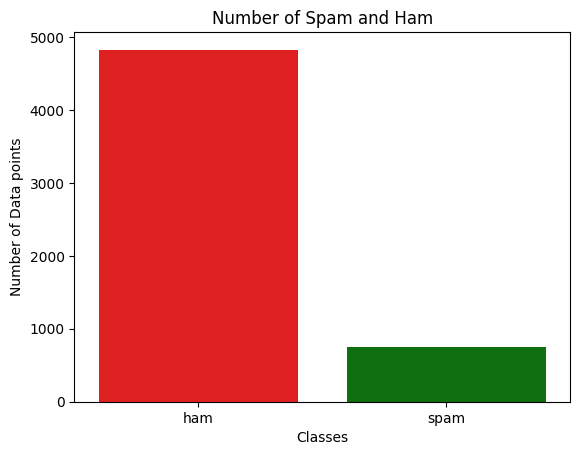

In [ ]:
fig=sns.countplot(x=d_in['spam_ham'], palette={"ham": "red", "spam": "green"})
fig.set_title("Number of Spam and Ham")
fig.set_xlabel("Classes")
fig.set_ylabel("Number of Data points")
plt.show(fig)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(d_in['massage'],d_in['isSpam'])
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

isSpam
0    3612
1     567
Name: count, dtype: int64
isSpam
0    1213
1     180
Name: count, dtype: int64


<ipython-input-27-506201a07127>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=full_labels, ax=axes[0], palette={"0": "orange", "1": "blue"})
<ipython-input-27-506201a07127>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[1], palette={"0": "orange", "1": "blue"})


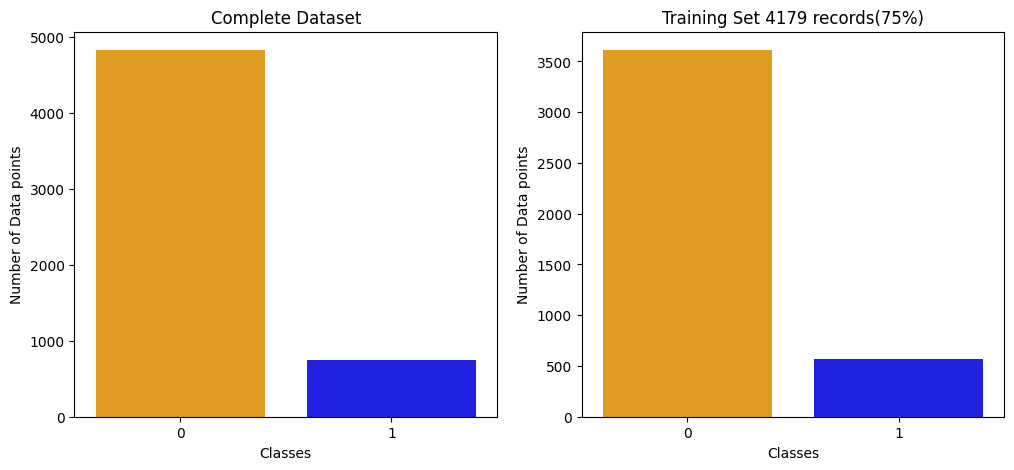

In [ ]:
full_dataset = pd.concat([x_train, x_test], axis=0)
full_labels = pd.concat([y_train, y_test], axis=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x=full_labels, ax=axes[0], palette={"0": "orange", "1": "blue"})
axes[0].set_title("Complete Dataset")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Number of Data points")

sns.countplot(x=y_train, ax=axes[1], palette={"0": "orange", "1": "blue"})
axes[1].set_title("Training Set 4179 records(75%)")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Number of Data points")
plt.show()

In [ ]:
cv = CountVectorizer()
word_count = cv.fit_transform(x_train)
word_count = word_count.toarray()
x=pd.DataFrame(word_count, columns=cv.get_feature_names_out()).head()

In [ ]:
model=MultinomialNB()
model.fit(word_count, y_train)

MultinomialNB()

In [ ]:
test=['''Subject: Urgent: Verify Your Account Information Now

Dear User,

Your account has been compromised, and we need you to verify your account information immediately. Click the link below to log in and secure your account:

[Phishing Link]

Thank you for your prompt attention to this matter.

Sincerely,
Scam Artist
''']
t_count=cv.transform(test)
model.predict(t_count)

array([1])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1213
           1       0.99      0.92      0.96       180

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.98      1393
weighted avg       0.99      0.99      0.99      1393



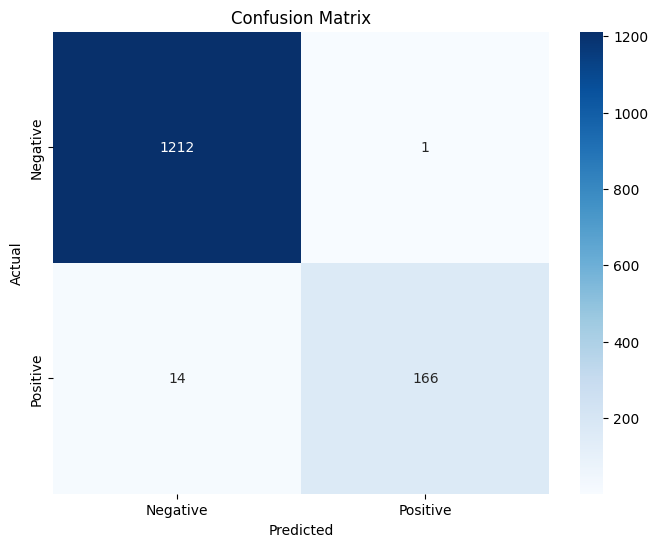

In [ ]:
x_test_count=cv. transform(x_test)
print(classification_report(y_test, model.predict(x_test_count)))
y_pred = model.predict(x_test_count)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('The accuracy of Naive Bayes Model is :',model.score(x_test_count,y_test))

The accuracy of Naive Bayes Model is : 0.9892318736539842
